In [44]:
import scipy.stats as st
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import meteostat
from meteostat import Point, Monthly, Daily

# Import the API key
#from config import geoapify_key

In [2]:
coords = pd.read_csv('../data/mlb_locations.csv')

In [85]:
coords

,Unnamed: 0,team,address,lat,lng
0,0,LAA,"2000 Gene Autry Way, Anaheim, CA. 92806",33.799572,-117.889031
1,1,ARI,"P.O. Box 2095, Phoenix, AZ. 85001",33.452922,-112.038669
2,2,ATL,"P.O. Box 4064, Atlanta, GA. 30302",33.746910,-84.391239
3,3,BAL,"333 W. Camden Street, Baltimore, MD. 21201",39.285243,-76.620103
4,4,BOS,"4 Yawkey Way, Boston, MA 02215",42.346613,-71.098817
5,5,CHN,"1060 Addison Street, Chicago, IL 60616",41.947201,-87.656413
6,6,CHA,"333 W. 35th Street, Chicago, IL 60616",41.830883,-87.635083
7,7,CIN,"100 Cinergy Field, Cincinnati, OH 45202",39.107183,-84.507713
8,8,CLE,"2401 Ontario Street, Cleveland, OH 44115",41.495149,-81.687090
9,9,COL,"Coors Field, 2001 Blake Street, Denver, CO 802...",39.756980,-104.965329


In [86]:
start = datetime(2019, 3, 31)
end = datetime(2019, 9, 30)


location = Point(33.799572, -117.889031)

# Get daily data for 2018
data = Monthly(location, start, end)
data = data.fetch()
data.head(20)

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2019-03-01,15.9,11.2,20.6,50.0,8.7,1017.1,NaN
2019-04-01,17.9,13.9,23.3,1.0,9.8,1015.2,NaN
2019-05-01,17.3,14.0,21.5,13.0,9.6,1013.3,NaN
2019-06-01,20.3,17.3,25.2,1.0,9.1,1013.6,NaN
2019-07-01,23.0,19.1,28.5,0.0,6.5,1013.6,NaN
2019-08-01,23.5,19.0,29.7,0.0,8.8,1012.7,NaN
2019-09-01,23.6,19.3,29.6,0.0,8.3,1012.0,NaN


In [101]:
start = datetime(2019, 3, 31)
end = datetime(2019, 9, 30)

big_list = []
for i,row in coords.iterrows():
    location = Point(row['lat'], row['lng'])
    
    data = Monthly(location, start, end)
    big_list.append(data.fetch().mean())


In [115]:
weather_df = pd.DataFrame(big_list, columns = ['tavg','tmin','tmax','prcp','wspd','pre','tsun'])
weather_df.reset_index()
weather_df_2 = pd.merge(weather_df,coords,left_index=True, right_index=True)
weather_df_2
new_df = weather_df_2[['team','tavg','wspd','prcp']]
new_df

,team,tavg,wspd,prcp
0,LAA,20.214286,8.685714,9.285714
1,ARI,29.100000,11.957143,4.142857
2,ATL,22.571429,11.842857,79.571429
3,BAL,20.471429,10.657143,83.857143
4,BOS,16.942857,17.057143,107.000000
5,CHN,16.828571,15.500000,144.600000
6,CHA,16.828571,15.500000,144.600000
7,CIN,18.585714,11.457143,112.714286
8,CLE,16.728571,15.800000,96.000000
9,COL,18.583333,13.466667,30.771429


In [116]:
new_df.to_csv("../data/weather_2019.csv", sep=',')

In [4]:
start = datetime(2020, 3, 31)
end = datetime(2020, 9, 30)

big_list = []
for i,row in coords.iterrows():
    location = Point(row['lat'], row['lng'])
    
    data = Monthly(location, start, end)
    big_list.append(data.fetch().mean())

In [5]:
weather_df = pd.DataFrame(big_list, columns = ['tavg','tmin','tmax','prcp','wspd','pre','tsun'])
weather_df.reset_index()
weather_df_2 = pd.merge(weather_df,coords,left_index=True, right_index=True)
weather_df_2
new_df = weather_df_2[['team','tavg','wspd','prcp']]
new_df

,team,tavg,wspd,prcp
0,LAA,21.028571,7.657143,22.000000
1,ARI,30.357143,11.185714,11.000000
2,ATL,21.457143,9.714286,126.857143
3,BAL,19.600000,10.828571,130.428571
4,BOS,16.171429,17.485714,64.714286
5,CHN,17.585714,15.057143,110.785714
6,CHA,17.585714,15.057143,110.785714
7,CIN,18.042857,9.957143,108.714286
8,CLE,17.185714,15.928571,126.714286
9,COL,19.583333,13.733333,27.300000


In [6]:
new_df.to_csv("../data/weather_2020.csv", sep=',')

In [7]:
start = datetime(2021, 3, 31)
end = datetime(2021, 9, 30)

big_list = []
for i,row in coords.iterrows():
    location = Point(row['lat'], row['lng'])
    
    data = Monthly(location, start, end)
    big_list.append(data.fetch().mean())

In [8]:
weather_df = pd.DataFrame(big_list, columns = ['tavg','tmin','tmax','prcp','wspd','pre','tsun'])
weather_df.reset_index()
weather_df_2 = pd.merge(weather_df,coords,left_index=True, right_index=True)
weather_df_2
new_df = weather_df_2[['team','tavg','wspd','prcp']]
new_df

,team,tavg,wspd,prcp
0,LAA,20.400000,6.985714,6.542857
1,ARI,29.428571,11.528571,16.428571
2,ATL,21.314286,7.871429,98.471429
3,BAL,20.042857,10.171429,96.000000
4,BOS,17.714286,16.800000,139.285714
5,CHN,18.471429,15.285714,74.057143
6,CHA,18.471429,15.285714,74.057143
7,CIN,18.257143,8.871429,100.457143
8,CLE,18.285714,15.800000,82.728571
9,COL,15.985714,14.128571,82.557143


In [9]:
new_df.to_csv("../data/weather_2021.csv", sep=',')

In [31]:
w2019 = pd.read_csv('../data/weather_2019.csv')
w2019['year']=2019
w2020 = pd.read_csv('../data/weather_2020.csv')
w2020['year']=2020
w2021 = pd.read_csv('../data/weather_2021.csv')
w2021['year']=2021
batting_avg = pd.read_csv('../data/mergedbattingandsalary.csv')

In [34]:
master_0 = w2019.append(w2020,ignore_index=True)
master = master_0.append(w2021,ignore_index=True).sort_values('team',ascending=True)
step = master[['team','year','tavg','wspd','prcp']]
combined = pd.merge(step,batting_avg,on=['team','year'])
combined_clean = combined[['team','year','tavg','wspd','prcp','AVG']]
combined_clean.head()

,team,year,tavg,wspd,prcp,AVG
0,ARI,2019,29.100000,11.957143,4.142857,0.251908
1,ARI,2021,29.428571,11.528571,16.428571,0.236291
2,ARI,2020,30.357143,11.185714,11.000000,0.241362
3,ATL,2019,22.571429,11.842857,79.571429,0.257554
4,ATL,2021,21.314286,7.871429,98.471429,0.243707


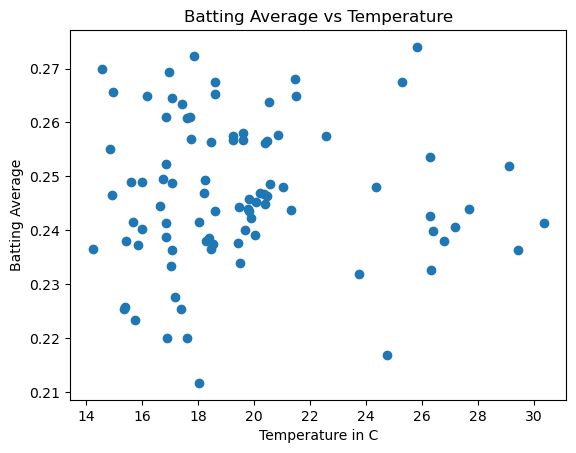

The correlation coefficient between batting average and temperature is 0.0


In [48]:
x_ax = combined_clean['tavg']
y_ax = combined_clean['AVG']
plt.scatter(x_ax, y_ax)
plt.title('Batting Average vs Temperature')
plt.ylabel('Batting Average')
plt.xlabel('Temperature in C')
plt.savefig('../images/Temperature_scatter.png')
plt.show()
print(f"The correlation coefficient between batting average and temperature is {round(st.pearsonr(x_ax,y_ax)[0],2)}")

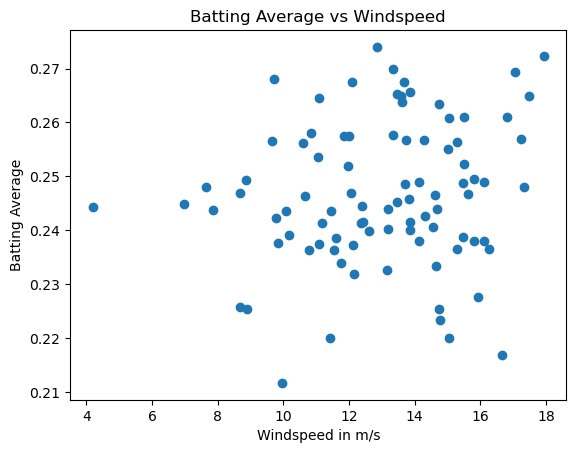

The correlation coefficient between batting average and windspeed is 0.15


In [49]:
x_ax = combined_clean['wspd']
y_ax = combined_clean['AVG']
plt.scatter(x_ax, y_ax)
plt.title('Batting Average vs Windspeed')
plt.ylabel('Batting Average')
plt.xlabel('Windspeed in m/s')
plt.savefig('../images/Windspeed_scatter.png')
plt.show()
print(f"The correlation coefficient between batting average and windspeed is {round(st.pearsonr(x_ax,y_ax)[0],2)}")

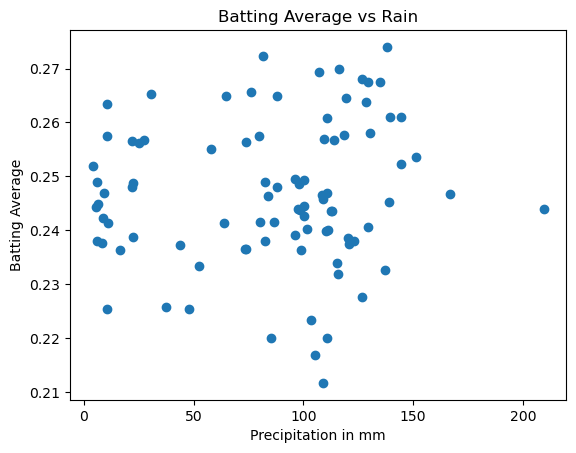

The correlation coefficient between batting average and rain is 0.09


In [50]:
x_ax = combined_clean['prcp']
y_ax = combined_clean['AVG']
plt.scatter(x_ax, y_ax)
plt.title('Batting Average vs Rain')
plt.ylabel('Batting Average')
plt.xlabel('Precipitation in mm')
plt.savefig('../images/Rain_scatter.png')
plt.show()
print(f"The correlation coefficient between batting average and rain is {round(st.pearsonr(x_ax,y_ax)[0],2)}")

In [51]:
corr = combined_clean.corr()
corr.unstack().sort_values()

AVG   year   -0.258031
year  AVG    -0.258031
wspd  year   -0.213498
year  wspd   -0.213498
wspd  tavg   -0.170389
tavg  wspd   -0.170389
prcp  year   -0.092907
year  prcp   -0.092907
tavg  AVG     0.003146
AVG   tavg    0.003146
tavg  year    0.013692
year  tavg    0.013692
prcp  AVG     0.094571
AVG   prcp    0.094571
tavg  prcp    0.136334
prcp  tavg    0.136334
wspd  AVG     0.152300
AVG   wspd    0.152300
wspd  prcp    0.259171
prcp  wspd    0.259171
year  year    1.000000
wspd  wspd    1.000000
tavg  tavg    1.000000
prcp  prcp    1.000000
AVG   AVG     1.000000
dtype: float64